<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/food_habits_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food habits analytics

## Uploading packages and data

In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd

In [2]:
#Remove previous versions of the uploaded excel file
!rm food_habits.xlsx

In [3]:
#Uploading file from local drive
from google.colab import files
uploaded1 = files.upload()

Saving food_habits.xlsx to food_habits.xlsx


In [4]:
#Storing dataset in a Pandas Dataframe
import io
df1 = pd.read_excel(io.BytesIO(uploaded1['food_habits.xlsx']))

In [5]:
#Checking the dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        82 non-null     datetime64[ns]
 1   time        82 non-null     object        
 2   food        82 non-null     object        
 3   large_meal  82 non-null     int64         
 4   ache        82 non-null     int64         
 5   event       82 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 4.0+ KB


In [6]:
#Checking the dataframe head
df1.head(2)

,date,time,food,large_meal,ache,event
0,2020-07-29,21:05:00,"bread, pepperoni, ham, cheese, ricotta, mustar...",1,1,2020-07-29 21:04:59.808
1,2020-08-02,22:00:00,"pasta, tuna, mayonaise, mustard, carrots, cele...",0,1,2020-08-02 22:00:00.288


##Data Manipulation

In [46]:
#Extract year, month and day of week
df1 = df1.assign(date_2 = df1['date'].shift(fill_value=0), 
                 Year = df1['event'].dt.year,
                 Month = df1['event'].dt.month,
                 Day = df1['event'].dt.dayofweek)
df1 = df1.assign(Range = (df1['date'] - df1['date_2']).astype(str))
df1 = df1.assign(Range = df1['Range'].str.cat(sep=' ').split(' ')[0])
df1.tail(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing <class 'int'> to shift is deprecated and will raise in a future version, pass Timestamp instead.
  


,date,time,food,large_meal,ache,event,Date_2,Year,Month,Day,date_2,Range
77,2021-08-03,17:15:00,"gnocchi, lettuce, red_paprika, sausage, pesto,...",0,1,2021-08-03 17:15:00.000,2021-07-29,2021,8,1,2021-07-29,18472
78,2021-08-08,20:00:00,"spaghetti, egg, milk, ham, onion, olives, lett...",1,1,2021-08-08 19:59:59.712,2021-08-03,2021,8,6,2021-08-03,18472
79,2021-08-11,18:36:00,"chicken, avocado, lettuce, sweet_corn, red_pep...",1,1,2021-08-11 18:36:00.000,2021-08-08,2021,8,2,2021-08-08,18472
80,2021-08-20,02:00:00,"bread, mayonaise, salami, rice, tuna, oil, keb...",1,1,2021-08-20 01:59:59.712,2021-08-11,2021,8,4,2021-08-11,18472
81,2021-08-27,18:00:00,"cream, tomato_soup, chicken_tikamasala, rice, ...",1,1,2021-08-27 18:00:00.000,2021-08-20,2021,8,4,2021-08-20,18472


In [17]:
#Assigning categories for 2021
df1_2021 = df1[(df1['Year']==2021) & (df1['ache']==1)].reset_index(drop=True)
df1_2021 = df1_2021.assign(Cat = np.where(df1_2021['Month']<6, 'No_test', 'With_test'))
df1_2021.tail(2)

,date,time,food,large_meal,ache,event,Date_2,Year,Month,Day,date_2,Range,Cat
33,2021-08-20,02:00:00,"bread, mayonaise, salami, rice, tuna, oil, keb...",1,1,2021-08-20 01:59:59.712,2021-08-11,2021,8,4,2021-08-11,9 days,With_test
34,2021-08-27,18:00:00,"cream, tomato_soup, chicken_tikamasala, rice, ...",1,1,2021-08-27 18:00:00.000,2021-08-20,2021,8,4,2021-08-20,7 days,With_test


In [ ]:
#Couting the number of events by category
split(df1_2021['Range'].value_counts())

In [25]:
#Transforming aching meals into list
ache_1 = df1[df1['ache']==1]['food'].str.cat(sep=', ').split(", ")
ache_1[:5]

['bread', 'pepperoni', 'ham', 'cheese', 'ricotta']

In [26]:
#Building dictionary of occurrences for each food
import collections
ache_occurrences = collections.Counter(ache_1)
ache_occurrences.get('bread')

16

In [27]:
#Transforming list of aching meals into series
ache_meal_1 = pd.Series(data=ache_1)
ache_meal_1.tail()

629              rice
630              soda
631            banana
632         ice_cream
633    tortilla_chips
dtype: object

In [28]:
#Counting top aching foods
ache_meal_1 = ache_meal_1.value_counts().reset_index(name='count').rename(columns={'index':'food'})
ache_meal_1.head()

,food,count
0,cheese,25
1,rice,23
2,chocolate,20
3,onion,18
4,olive_oil,18


##Data Visualization

In [30]:
#Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [31]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 4)})

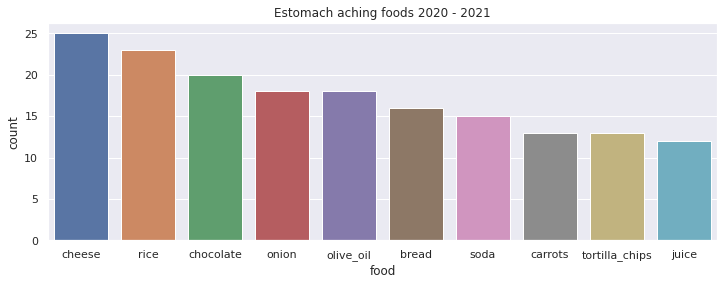

In [32]:
#Plotting the top 10 estomach aching meals
sns.barplot(x='food', y='count', data=ache_meal_1[:10])
plt.title('Estomach aching foods 2020 - 2021')
plt.show()

In [41]:
#Plotting the boxplot of days without ache
sns.boxplot(x='Range', data=df1_2021)
plt.title('Days without ache - Before and After Treatment')
plt.show()

TypeError: ignored

In [ ]:
#Plotting the number of aching meals by month
@interact(year=[2021, 2020])
def plot_graph(year):
  sns.barplot(x='month', y='count', data=df1_agg[df1_agg['year']==year], hue='ache')
  plt.title(f'Meals in {year}')
  plt.show()

In [ ]:
#Exporting to excel into local disk
from google.colab import files
df1.to_excel('food_habits.xlsx', index=False) #==> Excluding index from file
files.download('food_habits.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>